#**ENSEMBLE TECHNIQUES**

We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc.

## **Activities**:


1. Data Pre-processing
2. Building Machine Learning models:

  a. Decision Tree

  b. Regularization to Prune Decision Tree

  c. Ensemble models

    i) Bagging

    ii) AdaBoosting

    iii)  GradientBoost

    iv) XGBoost

    v) Random Forest


## Import Libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [36]:
creditData = pd.read_csv("credit.csv")
creditData.head(10) #several missing values!

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [37]:
creditData.shape

(1000, 17)

In [38]:
creditData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

Lets convert the columns with an 'object' datatype into categorical variables

In [39]:
for feature in creditData.columns: # Loop through all columns in the dataframe
    if creditData[feature].dtype == 'object': # Only apply for columns with categorical strings
        creditData[feature] = pd.Categorical(creditData[feature]).codes # Replace strings with an integer
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1
5,3,36,1,3,9055,4,0,2,4,35,1,0,1,3,2,1,0
6,3,24,1,4,2835,1,3,3,4,53,1,1,1,1,1,0,0
7,0,36,1,1,6948,2,0,2,2,35,1,2,1,0,1,1,0
8,3,12,1,4,3059,3,1,2,4,61,1,1,1,3,1,0,0
9,0,30,0,1,5234,2,4,4,2,28,1,1,2,0,1,0,1


In [40]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [41]:
print(creditData.checking_balance.value_counts())
print(creditData.credit_history.value_counts())
print(creditData.purpose.value_counts())
print(creditData.savings_balance.value_counts())
print(creditData.employment_duration.value_counts())
print(creditData.other_credit.value_counts())
print(creditData.housing.value_counts())
print(creditData.job.value_counts())
print(creditData.phone.value_counts())


3    394
1    274
0    269
2     63
Name: checking_balance, dtype: int64
1    530
0    293
3     88
4     49
2     40
Name: credit_history, dtype: int64
4    473
1    337
0     97
3     59
5     22
2     12
Name: purpose, dtype: int64
2    603
4    183
0    103
1     63
3     48
Name: savings_balance, dtype: int64
0    339
3    253
1    174
2    172
4     62
Name: employment_duration, dtype: int64
1    814
0    139
2     47
Name: other_credit, dtype: int64
1    713
2    179
0    108
Name: housing, dtype: int64
1    630
3    200
0    148
2     22
Name: job, dtype: int64
0    596
1    404
Name: phone, dtype: int64


In [42]:
#those features with order in their categories

replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 }
                    }


#those features with NO order in their categories
oneHotCols=["purpose","housing","other_credit","job"]


In [43]:
creditData=creditData.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_0,housing_1,housing_2,other_credit_0,other_credit_1,other_credit_2,job_0,job_1,job_2,job_3
0,1,6,0,1169,4,3,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,0,48,1,5951,2,0,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,3,12,0,2096,2,1,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,1,7882,2,1,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,3,4870,2,0,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,3,36,1,9055,4,0,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,3,24,1,2835,1,3,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,0,36,1,6948,2,0,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,3,12,1,3059,3,1,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,0,30,0,5234,2,4,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [44]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   amount                1000 non-null   int64
 4   savings_balance       1000 non-null   int8 
 5   employment_duration   1000 non-null   int8 
 6   percent_of_income     1000 non-null   int64
 7   years_at_residence    1000 non-null   int64
 8   age                   1000 non-null   int64
 9   existing_loans_count  1000 non-null   int64
 10  dependents            1000 non-null   int64
 11  phone                 1000 non-null   int8 
 12  default               1000 non-null   int8 
 13  purpose_0             1000 non-null   uint8
 14  purpose_1             1000 non-null   uint8
 15  purpose_2             1000 non-null   uint8
 16  purpose

## Split Data

In [45]:
creditData.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_0,housing_1,housing_2,other_credit_0,other_credit_1,other_credit_2,job_0,job_1,job_2,job_3
0,1,6,0,1169,4,3,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,0,48,1,5951,2,0,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,3,12,0,2096,2,1,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,1,7882,2,1,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,3,4870,2,0,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0


In [46]:
X = creditData.drop("default" , axis=1)
y = creditData.pop("default")

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [48]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [49]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))



1.0
0.6733333333333333


## Visualizing the Decision Tree

In [50]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)


In [51]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


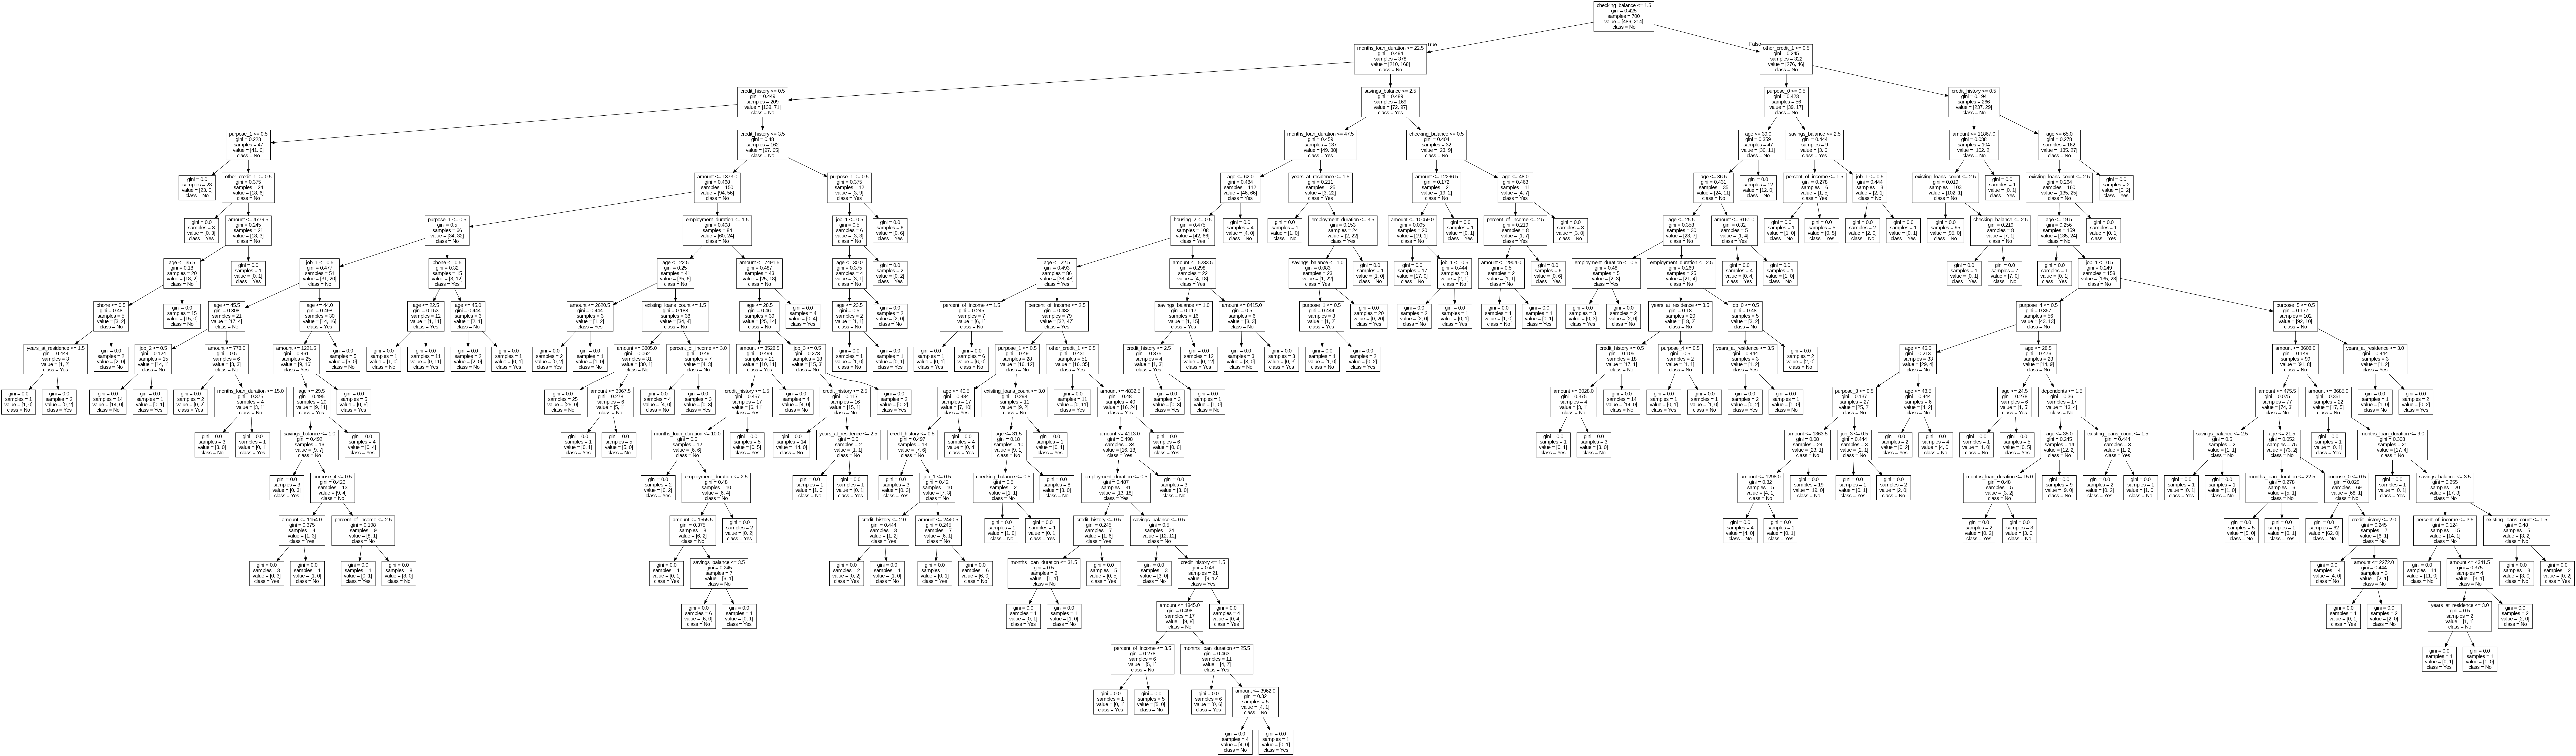

In [52]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))



## Prunning: Reducing over fitting (Regularization)

In [53]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7542857142857143
0.7366666666666667


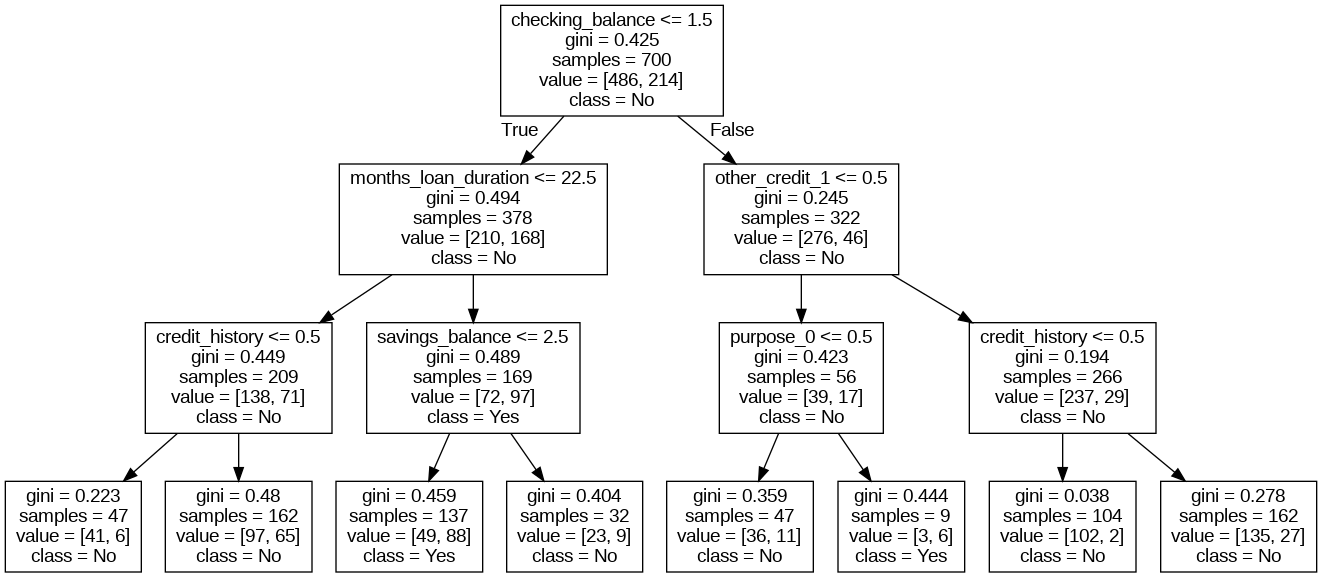

In [54]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))



In [55]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Importance"], index = X_train.columns))

                      Importance
checking_balance        0.500592
months_loan_duration    0.162298
credit_history          0.129883
amount                  0.000000
savings_balance         0.107056
employment_duration     0.000000
percent_of_income       0.000000
years_at_residence      0.000000
age                     0.000000
existing_loans_count    0.000000
dependents              0.000000
phone                   0.000000
purpose_0               0.044749
purpose_1               0.000000
purpose_2               0.000000
purpose_3               0.000000
purpose_4               0.000000
purpose_5               0.000000
housing_0               0.000000
housing_1               0.000000
housing_2               0.000000
other_credit_0          0.000000
other_credit_1          0.055422
other_credit_2          0.000000
job_0                   0.000000
job_1                   0.000000
job_2                   0.000000
job_3                   0.000000


0.7366666666666667


<Axes: >

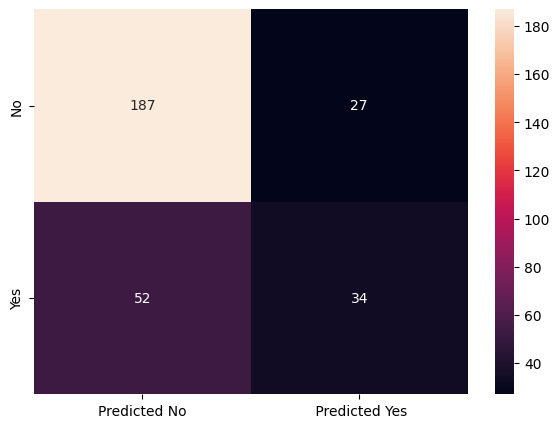

In [56]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


#                             Ensemble Learning - Bagging

Builds on complex models and helps to avoid Overfitting. It samples the dataset to feed to each weak learner in parallel and uses voting mechanism to provide the final output.

In [57]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7633333333333333


<Axes: >

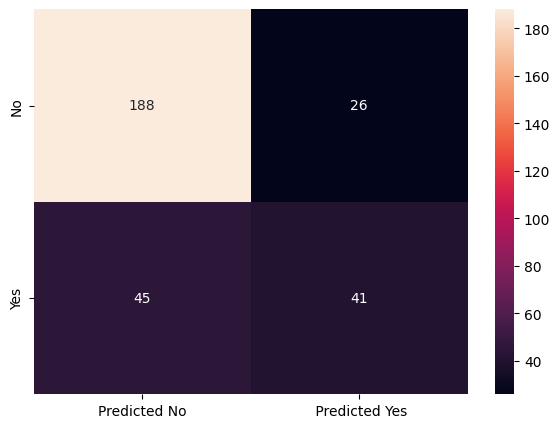

In [58]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



# Ensemble Learning - AdaBoosting

Here it builds on simple models and each model builds on the errors or residuals of the previous model in sequence.
If you try to use the complex base model ***base_estimator=dTree***, you will realise that it does quite poor, this is because the first model in the sequence does really well and the rest of the models does not really have much to do and they end up hurting the first model instead of helping. You can rather use the ***base_estimator=dTreeR*** which is a simple model and you will realise some improvement.

The best approach is to leave the *AdaBoost* to figure it out and start with very simple base model with a depth of **1**.

In [59]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


0.7433333333333333


<Axes: >

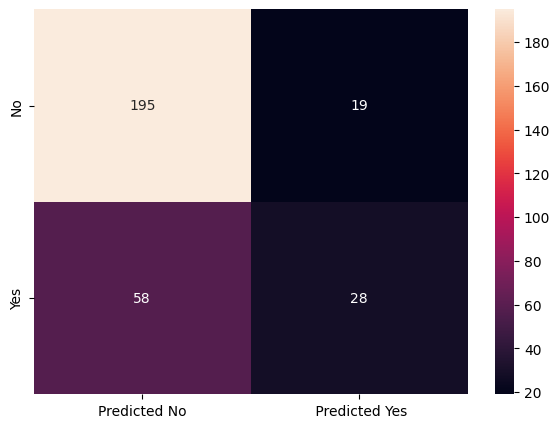

In [60]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



#                     Ensemble Learning - GradientBoost

Gradient Boost also uses simple base leaners. The first base learner tries to predict our target **(Y)** and gives us **(y_hat)** and the next model tries to predict the difference between *Y* and *y_hat*, **(Y -- y_hat)**, which is basically the residuals. Third model tries to predict the residuals from the second model and so on...

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


0.73


<Axes: >

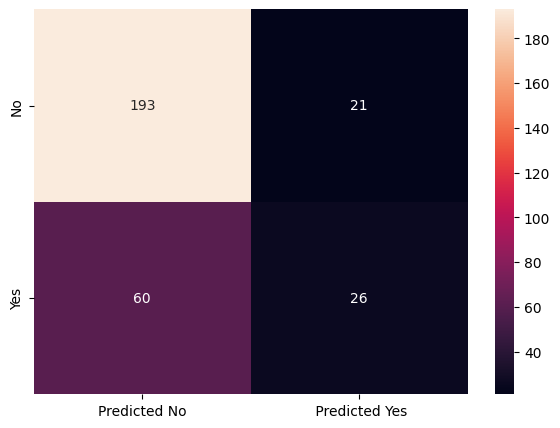

In [62]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#                     Ensemble Learning - XGBoost

It is an extension of the Gradient Boost technique.

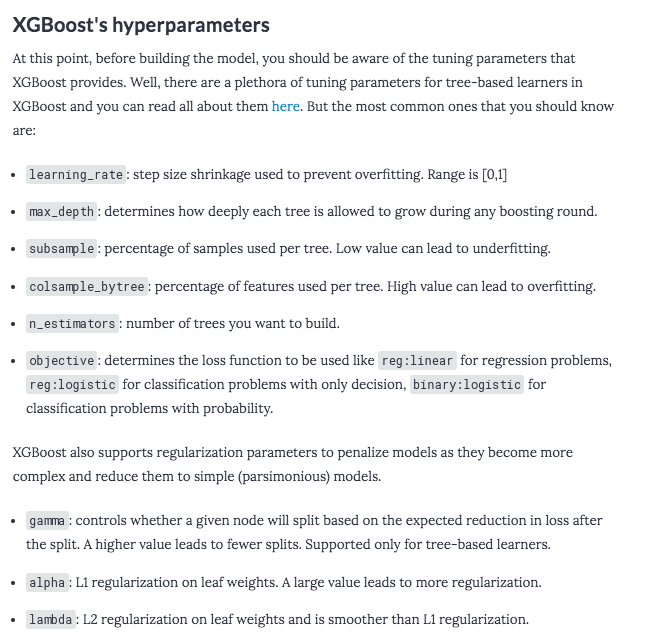

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.7233333333333334


<Axes: >

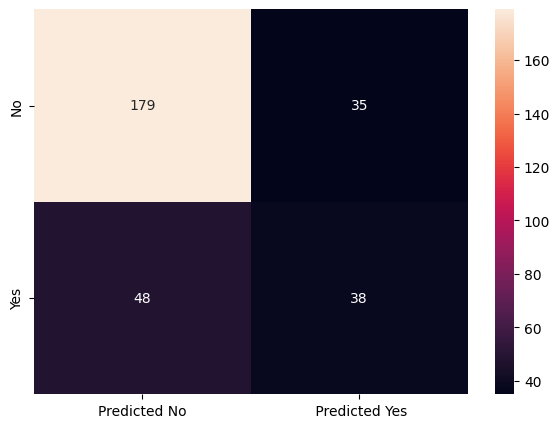

In [64]:
y_predict = xgb.predict(X_test)
print(xgb.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


You can perform hyperparameter tuning on the XGBoost model to get a better score.

# Ensemble RandomForest Classifier

In random forest we subset the rows to create different trees. Again while building the tree, we again randomly subset the initial subset to grow the tree further.

It needs to start with a complex model since it is a *Bagging* technique, so if you start with a simple tree with a depth of say 3, you will realise that the score will decrease. As you increase the depth, the performance will increase as well.
At some point the depth wouldn't matter to improve the performance anymore, even if you increase it. It is therefore advisable to allow the algorithm to choose the best depth by itself.

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.7666666666666667


<Axes: >

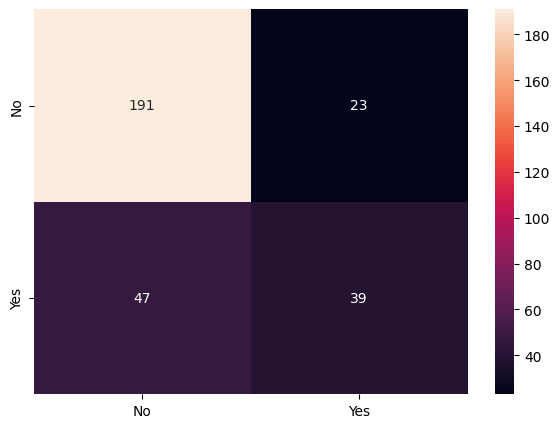

In [66]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')